After downloading the surface temperature and precipitation, we can now plot it for the continental United States.

In [3]:
import xarray as xarr
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# open file, convert to celsius
datafile = "CONUS_clipped_precipitation_temperature_1988.nc"
data = xarr.open_dataset(datafile)
data["t2m_celsius"] = data['t2m'] - 273.15

# calculate mean
mean_temp = data["t2m_celsius"].mean(dim='valid_time')
mean_precipitation = data['tp'].mean(dim='valid_time')

# calculate the nationwide means over time
temp_timeseries = data['t2m_celsius'].mean(dim=['latitude', 'longitude'])
precipitation_timeseries = data['tp'].mean(dim=['latitude', 'longitude'])


Now that we have all of the needed variables initialized, we can begin plotting the map. Let's plot the annual average surface temp across the continental United States.

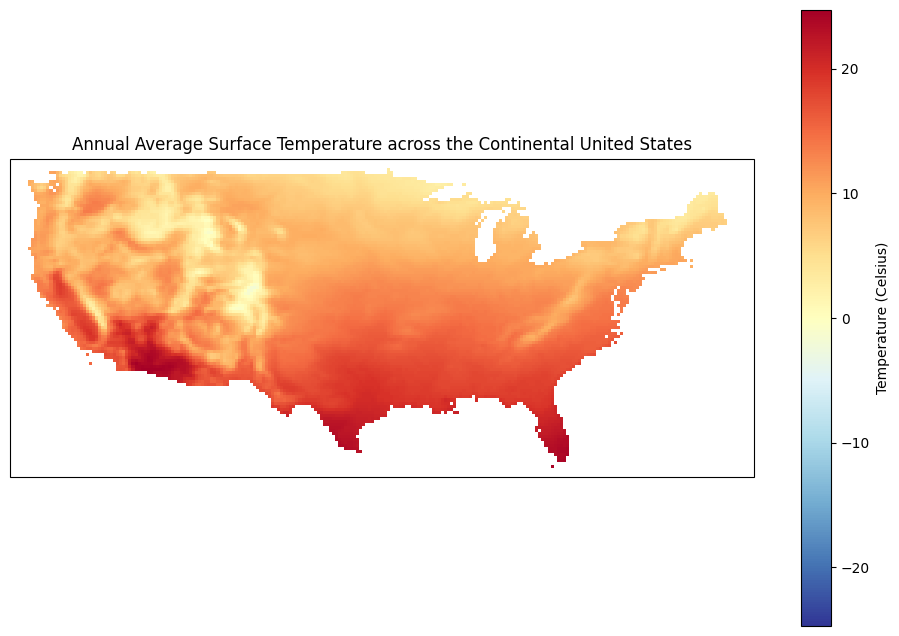

In [4]:
# figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()}) # flatten projection

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Surface Temperature across the Continental United States")
plot.show()

Accordingly, let's do the same for precipitation.

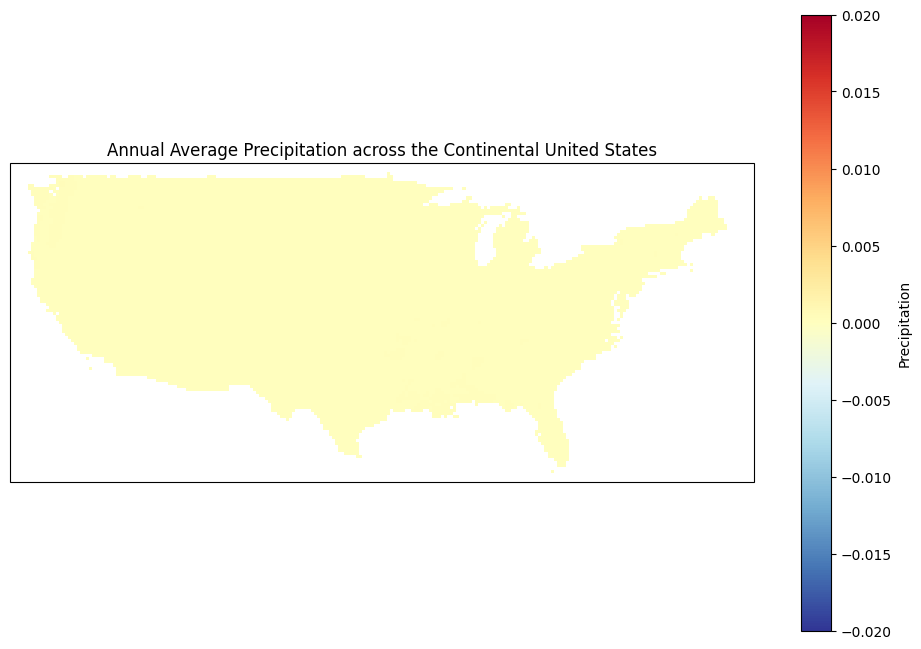

In [5]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
clwc_plot = mean_precipitation.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=-0.02, vmax=0.02, add_colorbar=True)
clwc_plot.colorbar.set_label("Precipitation")

# plot, show
plot.title("Annual Average Precipitation across the Continental United States")
plot.show()

(Like some of the other samples, the average precipitation is essentially zero for all points.)

Let's now plot the annual average across the entire continental United States with a graph that shows how temperature changed with time.

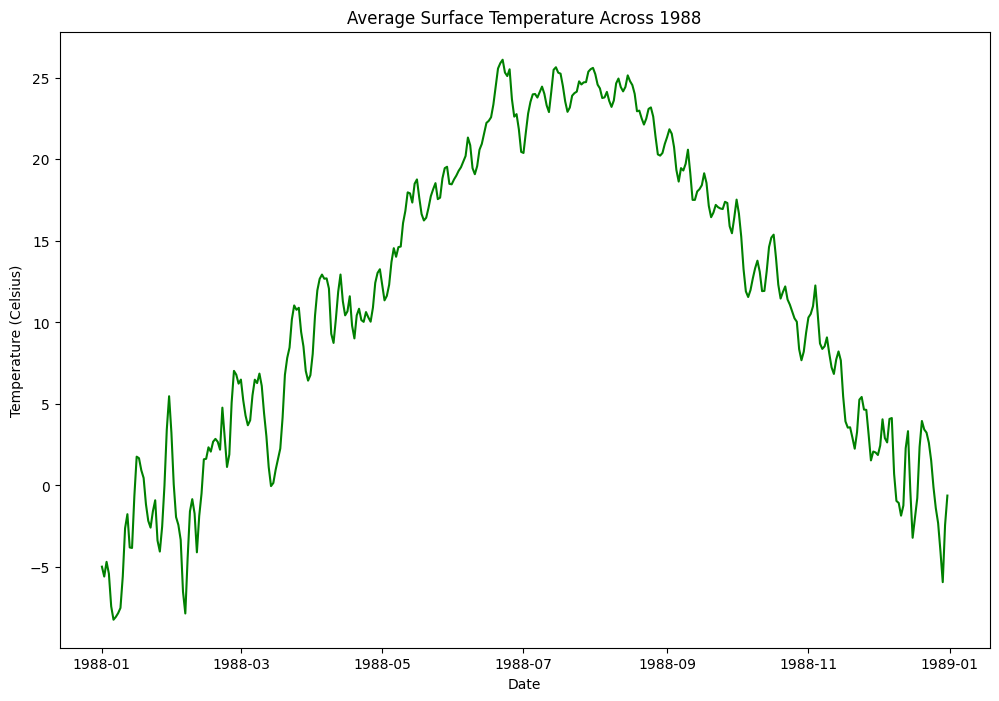

In [7]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="green")

# labels
plot.ylabel('Temperature (Celsius)')
plot.xlabel("Date")
plot.title("Average Surface Temperature Across 1988")
plot.show()

And the same for precipitation: 

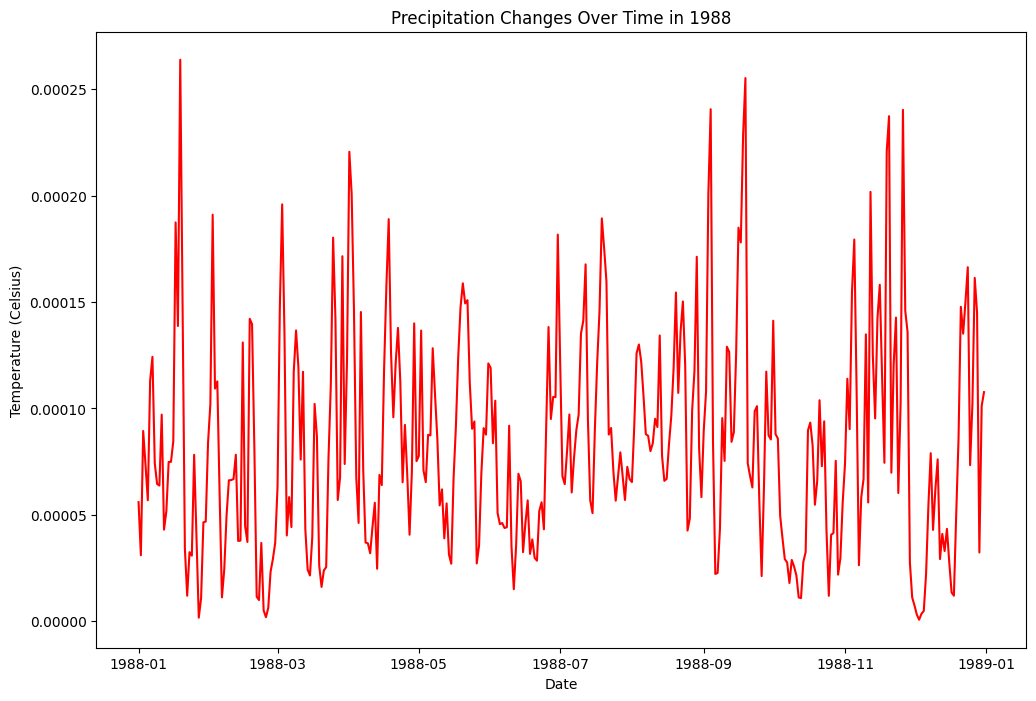

In [8]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(precipitation_timeseries.valid_time, precipitation_timeseries, color="red")
plot.ylabel('Temperature (Celsius)')
plot.xlabel("Date")
plot.title("Precipitation Changes Over Time in 1988")
plot.show()